In [1]:
from google.colab import files
uploaded = files.upload()

Saving imports-85.data to imports-85.data


In [2]:
# Import the necessary packages
import pandas as pd
import io
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.model_selection import train_test_split
# load data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df=pd.read_csv(io.BytesIO(uploaded['imports-85.data'])) #change the file names here

# giving names to columns
df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
#boxplot = df.boxplot(figsize=(15,15))
df = df.replace({"?":np.nan})
df['num-of-cylinders'] = df['num-of-cylinders'].replace({'eight':'8', 'five':'5','four':'4','six':'6','three':'3','twelve':'12','two':'2'})
df = df.astype({'normalized-losses':'float64','num-of-cylinders':'float64','wheel-base':'float64','length':'float64','width':'float64','engine-size':'float64','height':'float64','curb-weight':'float64','bore':'float64','stroke':'float64','compression-ratio':'float64','horsepower':'float64','peak-rpm':'float64','city-mpg':'float64','highway-mpg':'float64','price':'float64'})
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean(axis=0,skipna=True))

df['wheel-base'] = df['wheel-base'].fillna(df['wheel-base'].mean(axis=0,skipna=True))
df['length'] = df['length'].fillna(df['length'].mean(axis=0,skipna=True))
df['width'] = df['width'].fillna(df['width'].mean(axis=0,skipna=True))
df['height'] = df['height'].fillna(df['height'].mean(axis=0,skipna=True))
df['curb-weight'] = df['curb-weight'].fillna(df['curb-weight'].mean(axis=0,skipna=True))
df['engine-size'] = df['engine-size'].fillna(df['engine-size'].mean(axis=0,skipna=True))
df['bore'] = df['bore'].fillna(df['bore'].mean(axis=0,skipna=True))
df['stroke'] = df['stroke'].fillna(df['stroke'].mean(axis=0,skipna=True))
df['compression-ratio'] = df['compression-ratio'].fillna(df['compression-ratio'].mean(axis=0,skipna=True))
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean(axis=0,skipna=True))
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean(axis=0,skipna=True))
df['city-mpg'] = df['city-mpg'].fillna(df['city-mpg'].mean(axis=0,skipna=True))
df['highway-mpg'] = df['highway-mpg'].fillna(df['highway-mpg'].mean(axis=0,skipna=True))
le = le = preprocessing.LabelEncoder()
df['symboling'] = le.fit_transform(df['symboling'])
df['make'] = le.fit_transform(df['make'])
df['fuel-type'] = le.fit_transform(df['fuel-type'])
df['num-of-doors'] = le.fit_transform(df['body-style'])
df['drive-wheels'] = le.fit_transform(df['drive-wheels'])
df['engine-location'] = le.fit_transform(df['engine-location'])
df['engine-type'] = le.fit_transform(df['engine-type'])
df['fuel-system'] = le.fit_transform(df['fuel-system'])
df['body-style'] = le.fit_transform(df['body-style'])
df['aspiration'] = le.fit_transform(df['aspiration'])
'''
df['price'] = df['price'].fillna(df['price'].mean(axis=0,skipna=True))
'''
df = df.dropna()
#numeric variables : df['normalized-losses','wheel-base','length','width','num-of-cylinders','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
# preview
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,122.0,0,1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548.0,0,4.0,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,3,122.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823.0,5,6.0,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,4,164.0,1,1,0,3,3,1,0,99.8,176.6,66.2,54.3,2337.0,3,4.0,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,4,164.0,1,1,0,3,3,0,0,99.4,176.6,66.4,54.3,2824.0,3,5.0,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,4,122.0,1,1,0,3,3,1,0,99.8,177.3,66.3,53.1,2507.0,3,5.0,136.0,5,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [3]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return formula
data = df[['normalized-losses','num-of-cylinders','wheel-base','length','width','engine-size','height','curb-weight','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
data = data.rename(columns={'normalized-losses':'normalized_losses','num-of-cylinders':'num_of_cylinders','wheel-base':'wheel_base','engine-size':'engine_size','curb-weight':'curb_weight','compression-ratio':'compression_ratio','peak-rpm':'peak_rpm','city-mpg':'city_mpg','highway-mpg':'highway_mpg'})
print(data.columns)
response = "price"

Index(['normalized_losses', 'num_of_cylinders', 'wheel_base', 'length',
       'width', 'engine_size', 'height', 'curb_weight', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [4]:
train_Y = df['price']
data2 = forward_selected(data,response)
data2 = data2[8:]
data2 = data2.replace("_", "-")
print("columns based on forward selection: " + data2)
data2 = data2.split(" + ")
X = data2[0:len(data2)-2]
corr_X = df[X].copy()
corr_X2 = df[X].copy()
corr_X2 = sm.add_constant(corr_X2)
corr_X['price'] = df['price']
cor = corr_X.corr()
print("correlation with price: ")
print(cor['price'])
vif_df = [variance_inflation_factor(corr_X2.values, i) for i in range(corr_X2.shape[1])]
print("columns with high VIF values: ")
print(np.array(list(corr_X2.columns))[np.array(vif_df)>5])
print("All these columns are removed except const, engine size and width because engine size has the highest correlation with price and is also correlated with all the variables except length and width. Width and length were highly correlated so length was removed because it had a lower correlation with price")
X = X[:-6]
X.pop(1)
Y = X
print("Final set of columns: ", Y)
#X = ['width','engine-size','stroke','peak-rpm','compression-ratio'] #model chosen from forward propogation followed by removing collinear features based on filtering and then removing irrelevant features based on p values
#engine_size + curb_weight + peak_rpm + stroke + width + compression_ratio + horsepower + num_of_cylinders + bore + height + 1
train_X = df[X].copy()
train_X = sm.add_constant(train_X)
print("final VIF scores: ")
vif_df = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
print(vif_df)

columns based on forward selection: engine-size + curb-weight + peak-rpm + stroke + compression-ratio + width + horsepower + num-of-cylinders + bore + height + length + city-mpg + highway-mpg + 1
correlation with price: 
engine-size          0.872337
curb-weight          0.834420
peak-rpm            -0.101593
stroke               0.083298
compression-ratio    0.071176
width                0.752795
horsepower           0.809629
num-of-cylinders     0.708919
bore                 0.543433
height               0.137284
length               0.691044
city-mpg            -0.687186
price                1.000000
Name: price, dtype: float64
columns with high VIF values: 
['const' 'engine-size' 'curb-weight' 'width' 'horsepower'
 'num-of-cylinders' 'length' 'city-mpg']
All these columns are removed except const, engine size and width because engine size has the highest correlation with price and is also correlated with all the variables except length and width. Width and length were highly correl

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           9.32e-73
Time:                        18:34:07   Log-Likelihood:                -1902.4
No. Observations:                 200   AIC:                             3817.
Df Residuals:                     194   BIC:                             3837.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.374e+04   1.09e+0

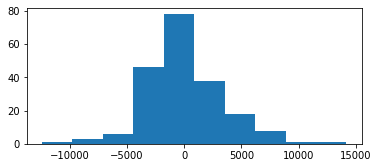

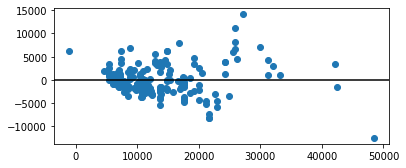

In [5]:
# YOUR CODE
fitted_model_1 = sm.OLS(endog= train_Y, exog=train_X, hasconst=True).fit()
print(fitted_model_1.summary())
print("R squared value: "+str(fitted_model_1.rsquared))
print("Adjusted R Squared value: "+str(fitted_model_1.rsquared_adj))
print("Diagnostics: ")
pred_val = fitted_model_1.fittedvalues.copy()
true_val = df['price'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)
plt.axhline(0, color='k')

TEXT CELL 1: Q1a.
What is the adj. R2 of your model: #0.8261535117838273

How many variables do you have: #5

What are the VIF values of each variable: # [2.3556044925919846, 1.3420588326660186, 1.0889041401852075, 1.3684628258635627, 2.28776804185166]

Does it pass the diagnostics: #Yes


In [6]:
for i in X:
  train_X = df[i].copy()
  train_X = sm.add_constant(train_X)
  fitted_model = sm.OLS(endog= train_Y, exog=train_X, hasconst=True).fit()
  print("Variance explained for " + str(i) + ": ",fitted_model.rsquared)
  print("P value for " + str(i) + ": ",fitted_model.pvalues[1])

Variance explained for engine-size:  0.7609714051425501
P value for engine-size:  1.8977171466561434e-63
Variance explained for peak-rpm:  0.01032108701146961
P value for peak-rpm:  0.1523043979301662
Variance explained for stroke:  0.006938539728123305
P value for stroke:  0.2409299872389901
Variance explained for compression-ratio:  0.0050659648548154745
P value for compression-ratio:  0.31656752744423466
Variance explained for width:  0.5667001060351047
P value for width:  8.256714148306712e-38


TEXT CELL2: Q1b.
What are the top 3 variables in your 1a. model:

#Engine Size (R2: 0.7609714051425501, p-value:1.8977171466561434e-63), #width (R2: 0.5667001060351047, p-value: 8.256714148306712e-38), #Peak RPM (R2: 0.01032108701146961, p-value:0.1523043979301662)

TEXT CELL 3: Q1c. Interpret the model for each of those top-3 predictors, in words.
# Engine size: For every unit increase in engine size, the price increases by a value of 147.4713. Width: For every unit increase in the value of width, the price increases by a value of 909.1492. Peak RPM: For every unit increase in the value of peak RPM, the price increases by a value of 3.2680

In [7]:
data = df[['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type','num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price']]
data = data.rename(columns={'fuel-type':'fuel_type', 'num-of-doors':'num_of_doors','body-style':'body_style','drive-wheels':'drive_wheels','engine-location':'engine_location','wheel-base':'wheel_base','engine-type':'engine_type','fuel-system':'fuel_system','normalized-losses':'normalized_losses','num-of-cylinders':'num_of_cylinders','wheel-base':'wheel_base','engine-size':'engine_size','curb-weight':'curb_weight','compression-ratio':'compression_ratio','peak-rpm':'peak_rpm','city-mpg':'city_mpg','highway-mpg':'highway_mpg'})
response = "price"
train_Y = df['price']
data2 = forward_selected(data,response)
data2 = data2[8:]
print(data2)
data2 = data2.replace("_", "-")
print("columns based on forward selection: " + data2)
data2 = data2.split(" + ")
X = data2[0:len(data2)-2]
corr_X = df[X].copy()
corr_X2 = df[X].copy()
corr_X2 = sm.add_constant(corr_X2)
corr_X['price'] = df['price']
cor = corr_X.corr()
print("correlation with price: ")
print(cor['price'])
vif_df = [variance_inflation_factor(corr_X2.values, i) for i in range(corr_X2.shape[1])]
print("columns with high VIF values: ")
rem = np.array(list(corr_X2.columns))[np.array(vif_df)>5]
print(rem)
rem = rem[2:]
for i in rem:
  X.pop(X.index(i))
print("Final set of columns: ", X)
train_X = df[X].copy()
train_X = sm.add_constant(train_X)
print("final VIF scores: ")
vif_df = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
print(vif_df)

engine_size + curb_weight + engine_location + make + width + stroke + drive_wheels + peak_rpm + fuel_type + num_of_doors + height + horsepower + normalized_losses + bore + num_of_cylinders + body_style + 1
columns based on forward selection: engine-size + curb-weight + engine-location + make + width + stroke + drive-wheels + peak-rpm + fuel-type + num-of-doors + height + horsepower + normalized-losses + bore + num-of-cylinders + body-style + 1
correlation with price: 
engine-size          0.872337
curb-weight          0.834420
engine-location      0.331098
make                -0.164899
width                0.752795
stroke               0.083298
drive-wheels         0.590292
peak-rpm            -0.101593
fuel-type           -0.110417
num-of-doors        -0.074108
height               0.137284
horsepower           0.809629
normalized-losses    0.133999
bore                 0.543433
num-of-cylinders     0.708919
price                1.000000
Name: price, dtype: float64
columns with high V

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     118.6
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.46e-80
Time:                        18:34:12   Log-Likelihood:                -1864.6
No. Observations:                 200   AIC:                             3755.
Df Residuals:                     187   BIC:                             3798.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.397e+04   1.09e+0

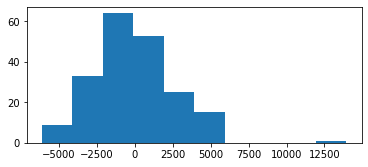

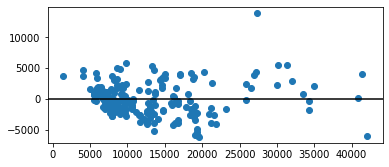

In [8]:
fitted_model_1 = sm.OLS(endog= train_Y, exog=train_X, hasconst=True).fit()
print(fitted_model_1.summary())
print("R squared value: "+str(fitted_model_1.rsquared))
print("Adjusted R Squared value: "+str(fitted_model_1.rsquared_adj))
print("Diagnostics: ")
pred_val = fitted_model_1.fittedvalues.copy()
true_val = df['price'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)
plt.axhline(0, color='k')

TEXT CELL 4: Q2
What is the adj. R2 of your model: #0.8763771653911526

How many variables do you have: #12

What are the VIF values of each variable: # [3.462146838940191, 1.521868013914162, 1.3031350485298454, 3.2285336396759834, 1.28311090151711, 1.8203595327079385, 1.914505191211211, 1.7117975596399129, 1.6615094440806588, 1.9628224069340316, 1.4481862444402462, 2.0869248311718867]

Does it pass the diagnostics: #Yes

In [9]:
df['engine-size-2'] = df['engine-size']**2
df['width-2'] = df['width']**2
df['stroke-2'] = df['stroke']**2
df['peak-rpm-2'] = df['peak-rpm']**2
df['height-2'] = df['height']**2
df['normalized-losses-2'] = df['normalized-losses']**2
data = df[['engine-size', 'engine-location', 'make', 'width', 'stroke', 'drive-wheels', 'peak-rpm', 'fuel-type', 'num-of-doors', 'height', 'normalized-losses', 'bore','engine-size-2','width-2','stroke-2','peak-rpm-2','height-2','normalized-losses','price']]
data = data.rename(columns={'fuel-type':'fuel_type','engine-size-2':'engine_size_2','width-2':'width_2','stroke-2':'stroke_2','peak-rpm-2':'peak_rpm_2','height-2':'height_2','normalized-losses-2':'normalized_losses_2', 'num-of-doors':'num_of_doors','body-style':'body_style','drive-wheels':'drive_wheels','engine-location':'engine_location','wheel-base':'wheel_base','engine-type':'engine_type','fuel-system':'fuel_system','normalized-losses':'normalized_losses','num-of-cylinders':'num_of_cylinders','wheel-base':'wheel_base','engine-size':'engine_size','curb-weight':'curb_weight','compression-ratio':'compression_ratio','peak-rpm':'peak_rpm','city-mpg':'city_mpg','highway-mpg':'highway_mpg'})
response = "price"
train_Y = df['price']
data2 = forward_selected(data,response)
data2 = data2[8:]
print(data2)
data2 = data2.replace("_", "-")
print("columns based on forward selection: " + data2)
data2 = data2.split(" + ")

X = data2[0:len(data2)-2]
corr_X = df[X].copy()
corr_X2 = df[X].copy()
corr_X2 = sm.add_constant(corr_X2)
corr_X['price'] = df['price']
cor = corr_X.corr()
print("correlation with price: ")
print(cor['price'])
vif_df = [variance_inflation_factor(corr_X2.values, i) for i in range(corr_X2.shape[1])]
print("columns with high VIF values: ")
rem = np.array(list(corr_X2.columns))[np.array(vif_df)>5]
print(rem)
print("Final set of columns: ", X)
train_X = df[X].copy()
train_X = sm.add_constant(train_X)
print("final VIF scores: ")
vif_df = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
print(vif_df)

engine_size + width_2 + engine_location + make + drive_wheels + stroke_2 + width + peak_rpm_2 + height + fuel_type + num_of_doors + height_2 + engine_size_2 + bore + 1
columns based on forward selection: engine-size + width-2 + engine-location + make + drive-wheels + stroke-2 + width + peak-rpm-2 + height + fuel-type + num-of-doors + height-2 + engine-size-2 + bore + 1
correlation with price: 
engine-size        0.872337
width-2            0.755912
engine-location    0.331098
make              -0.164899
drive-wheels       0.590292
stroke-2           0.097205
width              0.752795
peak-rpm-2        -0.093890
height             0.137284
fuel-type         -0.110417
num-of-doors      -0.074108
height-2           0.139804
engine-size-2      0.848161
price              1.000000
Name: price, dtype: float64
columns with high VIF values: 
['const' 'engine-size' 'width-2' 'width' 'height' 'height-2'
 'engine-size-2']
Final set of columns:  ['engine-size', 'width-2', 'engine-location', 'mak

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     114.6
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.38e-81
Time:                        18:34:15   Log-Likelihood:                -1860.1
No. Observations:                 200   AIC:                             3748.
Df Residuals:                     186   BIC:                             3794.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.634e+04   2.03e+05     

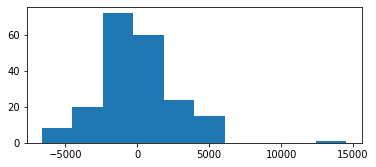

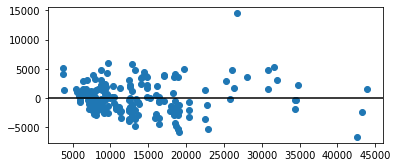

In [10]:
fitted_model_1 = sm.OLS(endog= train_Y, exog=train_X, hasconst=True).fit()
print(fitted_model_1.summary())
print("R squared value: "+str(fitted_model_1.rsquared))
print("Adjusted R Squared value: "+str(fitted_model_1.rsquared_adj))
print("Diagnostics: ")
pred_val = fitted_model_1.fittedvalues.copy()
true_val = df['price'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)
plt.axhline(0, color='k')

TEXT CELL 5: Q3
What is the adj. R2 of your model: #0.881271349660431
How many variables do you have: #13
What are the VIF values of each variable: # [42.76015525168256, 3404.59889195669, 1.5718775064886308, 1.3428564433341814, 1.6740672682422446, 1.405303128740085, 3403.0934379310975, 1.8291453783951024, 1386.240625194711, 1.6399048214441354, 1.7162705182105822, 1389.0199780338085, 34.69683774037185]
Does it pass the diagnostics: #Yes